In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


import sklearn
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

from mpl_toolkits.mplot3d import Axes3D

from random import randint

import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests


In [6]:
df = pd.read_csv("s3://big-data-class1/pre_pivot2.csv/part-00000-f813d225-c4c7-4ffa-a6e7-9b18fb4f95b6-c000.csv")

In [7]:
df.head()

,Timestamp,Ticker,ClosePrice
0,2020-01-02T04:00:00.000Z,AMT,229.980
1,2020-01-02T04:00:00.000Z,AXP,124.920
2,2020-01-02T04:00:00.000Z,BA,328.305
3,2020-01-02T04:00:00.000Z,BAC,35.530
4,2020-01-02T04:00:00.000Z,BAX,83.890


In [122]:
df1 = df.copy() #.drop(columns={"Timestamp"})

In [32]:
df2 = df1.pivot(index='Ticker', columns = 'Timestamp', values = 'ClosePrice')

In [35]:
df3 = df2.dropna(thresh=len(df2) - 100, axis=1)

In [38]:
df3.fillna(df3.mean(axis=0), inplace=True) 

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [65]:
df4 = df3.div(df3.sum(axis=1), axis=0)

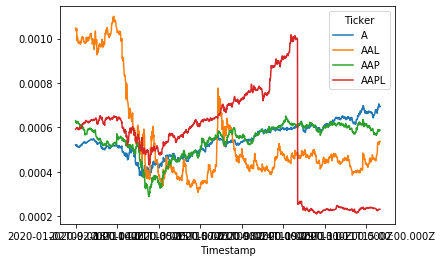

In [71]:
df4.loc[['A', 'AAL', 'AAP', 'AAPL']].T.plot()

In [73]:
X = np.array(df4)

In [98]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(X)

In [106]:
X_embedded = TSNE(n_components=2).fit_transform(X)

In [107]:
tsne_df_scale = pd.DataFrame(X_embedded, columns=['tsne1', 'tsne2'])

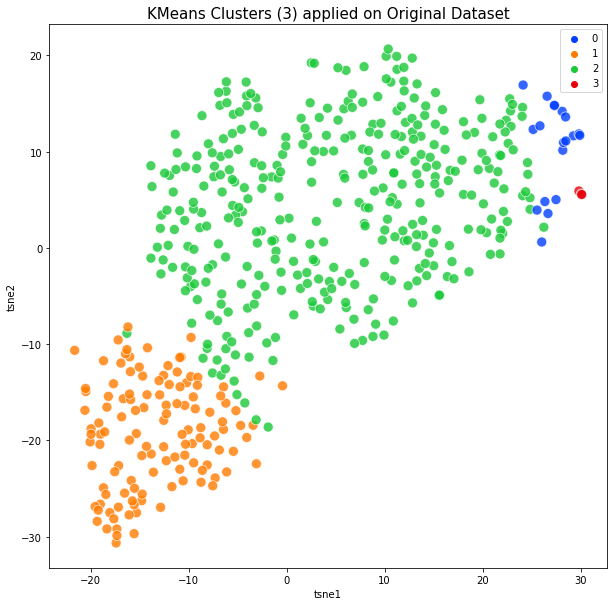

In [108]:
plt.figure(figsize = (10,10))
sns.scatterplot(tsne_df_scale['tsne1'], tsne_df_scale['tsne2'], 
                hue=kmeans.labels_, 
                palette='bright',
                s=100, alpha=0.8).set_title('KMeans Clusters (3) applied on Original Dataset', fontsize=15)

plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()

In [ ]:
X_embedded = TSNE(n_components=3).fit_transform(X)

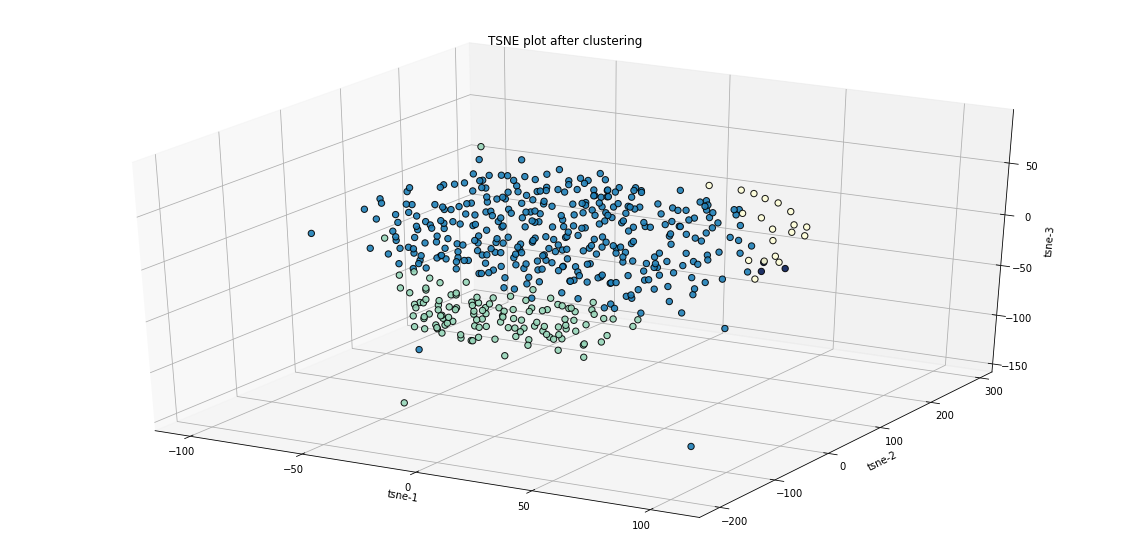

In [118]:
tsne_df_scale = pd.DataFrame(X_embedded, columns=['tsne1', 'tsne2', 'tsne3'])
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(tsne_df_scale.iloc[:,0], tsne_df_scale.iloc[:,2], tsne_df_scale.iloc[:,1], 
            c=kmeans.labels_, cmap='YlGnBu',
            edgecolor='k', s=40, alpha = 0.9)


ax.set_title("TSNE plot after clustering")
ax.set_xlabel("tsne-1")
ax.set_ylabel("tsne-2")
ax.set_zlabel("tsne-3")
ax.dist = 10

plt.autoscale(enable=True, axis='x', tight=True)    

plt.show()

## Convert to datetime and split by March 7

In [123]:
df1.head()

,Timestamp,Ticker,ClosePrice
0,2020-01-02T04:00:00.000Z,AMT,229.980
1,2020-01-02T04:00:00.000Z,AXP,124.920
2,2020-01-02T04:00:00.000Z,BA,328.305
3,2020-01-02T04:00:00.000Z,BAC,35.530
4,2020-01-02T04:00:00.000Z,BAX,83.890


In [124]:
df1.Timestamp = df1.Timestamp.apply(lambda x: x.replace('T', ' '))
df1.Timestamp = df1.Timestamp.apply(lambda x: x.replace('.000Z', ''))

In [125]:
df1.head()

,Timestamp,Ticker,ClosePrice
0,2020-01-02 04:00:00,AMT,229.980
1,2020-01-02 04:00:00,AXP,124.920
2,2020-01-02 04:00:00,BA,328.305
3,2020-01-02 04:00:00,BAC,35.530
4,2020-01-02 04:00:00,BAX,83.890


In [126]:
df1_pre = df1[df1['Timestamp'] < '2020-03-07 00:00:00']
df1_post = df1[df1['Timestamp'] > '2020-03-07 00:00:00']

In [146]:
df1_pre_t = df1_pre.pivot(index='Ticker', columns = 'Timestamp', values = 'ClosePrice')
df1_post_t = df1_post.pivot(index='Ticker', columns = 'Timestamp', values = 'ClosePrice')

df1_pre_t.fillna(df1_pre_t.mean(axis=0), inplace=True)
df1_post_t.fillna(df1_post_t.mean(axis=0), inplace=True)

In [147]:
df1_pre_t.head()

Timestamp,2020-01-02 04:00:00,2020-01-02 05:00:00,2020-01-02 06:00:00,2020-01-02 07:00:00,2020-01-02 08:00:00,2020-01-02 09:00:00,2020-01-02 10:00:00,2020-01-02 11:00:00,2020-01-02 12:00:00,2020-01-02 13:00:00,...,2020-03-06 11:00:00,2020-03-06 12:00:00,2020-03-06 13:00:00,2020-03-06 14:00:00,2020-03-06 15:00:00,2020-03-06 16:00:00,2020-03-06 17:00:00,2020-03-06 18:00:00,2020-03-06 19:00:00,2020-03-06 20:00:00
Ticker,,,,,,,,,,,,,,,,,,,,,
A,110.899518,92.01746,93.549668,88.284536,85.400000,86.030667,85.507167,85.453000,85.533276,85.402333,...,77.625833,77.329000,77.713667,77.186000,77.542500,78.560000,87.505396,82.057090,83.499853,51.344444
AAL,110.899518,92.01746,93.549668,88.284536,109.275700,29.145862,28.929333,28.846667,28.930333,28.842500,...,16.266500,16.285500,16.350000,16.048167,15.925167,15.970000,87.505396,82.057090,83.499853,51.344444
AAP,110.899518,92.01746,93.549668,88.284536,109.275700,160.416552,159.222830,158.648596,158.253273,157.651228,...,126.856102,125.764000,126.442321,125.448448,126.161500,127.873333,127.900000,127.000000,83.499853,51.344444
AAPL,110.899518,92.01746,93.549668,88.284536,109.275700,297.117586,297.618167,298.242500,298.483000,298.434167,...,285.943333,285.202833,286.067167,283.853167,284.983333,288.965000,87.505396,82.057090,83.499853,51.344444
ABBV,110.899518,92.01746,93.549668,89.090000,89.061579,88.897059,88.869667,89.270000,89.094000,89.054500,...,89.052833,88.728167,88.628500,87.704833,88.102667,88.888571,88.850000,88.516667,88.663333,51.344444


In [148]:
df1_post_t.head()

Timestamp,2020-03-09 04:00:00,2020-03-09 05:00:00,2020-03-09 06:00:00,2020-03-09 07:00:00,2020-03-09 08:00:00,2020-03-09 09:00:00,2020-03-09 10:00:00,2020-03-09 11:00:00,2020-03-09 12:00:00,2020-03-09 13:00:00,...,2020-11-25 11:00:00,2020-11-25 12:00:00,2020-11-25 13:00:00,2020-11-25 14:00:00,2020-11-25 15:00:00,2020-11-25 16:00:00,2020-11-25 17:00:00,2020-11-25 18:00:00,2020-11-25 19:00:00,2020-11-25 20:00:00
Ticker,,,,,,,,,,,,,,,,,,,,,
A,71.410052,84.99904,76.847766,73.200000,85.799825,72.518125,71.933000,71.827333,72.185667,71.906833,...,115.721333,115.334407,114.289333,114.000833,114.565667,114.552857,114.350000,83.77755,82.383815,66.4355
AAL,71.410052,84.99904,76.847766,85.476159,85.799825,15.142000,15.423167,15.127167,15.041500,14.673833,...,14.825000,14.843833,14.873833,14.834500,14.971000,14.950000,93.608647,83.77755,82.383815,66.4355
AAP,71.410052,84.99904,76.847766,124.000000,120.110000,122.105625,125.968167,129.126667,128.987119,129.079833,...,148.299434,149.559434,150.032222,149.968947,150.035439,149.400000,93.608647,83.77755,82.383815,66.4355
AAPL,71.410052,84.99904,76.847766,85.476159,85.799825,269.752000,273.390333,273.994667,275.240167,273.390500,...,116.255167,115.994667,116.090500,115.950667,116.178667,116.020000,93.608647,83.77755,82.383815,66.4355
ABBV,71.410052,84.99904,76.847766,84.467500,83.574828,83.713077,83.970500,85.560667,86.371333,85.227500,...,103.788000,103.764500,103.792167,103.607833,103.950167,104.262308,104.140000,104.00000,104.133333,66.4355


In [177]:
df1_pre_t_norm= df1_pre_t.div(df1_pre_t.sum(axis=1), axis=0)
df1_post_t_norm= df1_pre_t.div(df1_post_t.sum(axis=1), axis=0)



(494, 764)

In [178]:
df1_post_t_norm.dropna(inplace = True)

In [180]:
df1_post_t_norm.shape

(492, 764)

In [182]:
X_pre = np.array(df1_pre_t_norm)
X_post = np.array(df1_post_t_norm)

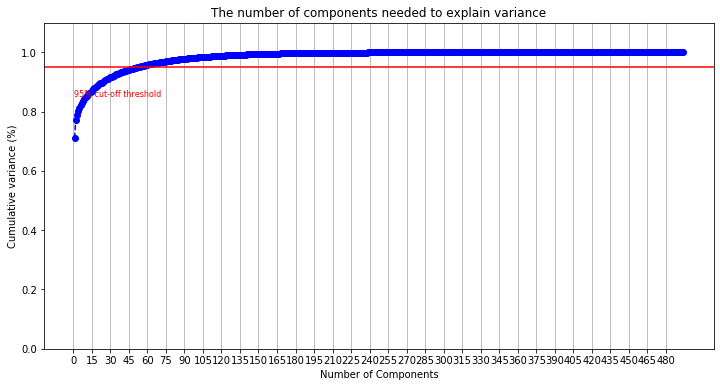

In [151]:
# obtain 95% variance, need to decompose to 7 features
# scaler = MinMaxScaler()
# data_rescaled = scaler.fit_transform(X_pre)
dims = 495

pca = PCA(n_components = 0.95)
pca.fit(X_pre)
reduced = pca.transform(X_pre)


pca = PCA().fit(X_pre)
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, dims, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, dims, step=15)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=8)

ax.grid(axis='x')
plt.show()

# To maintain 95% of the varaince, we need 45-60 dimensions. We will use 60

In [152]:
components = 60
pca = PCA(n_components=components)
pca_x_pre = pca.fit_transform(X_pre)

(502, 764)

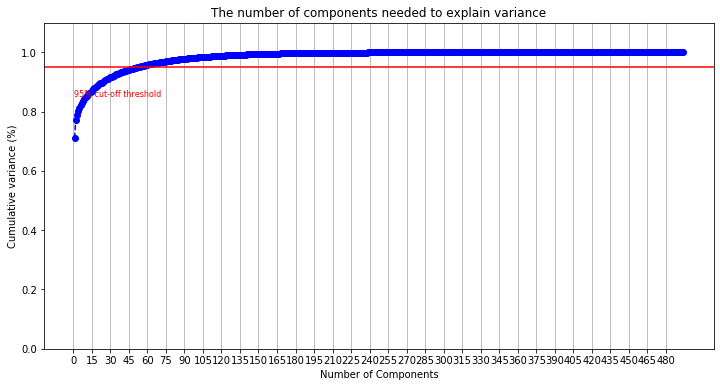

In [183]:
# obtain 95% variance, need to decompose to 7 features
# scaler = MinMaxScaler()
# data_rescaled = scaler.fit_transform(X_pre)
dims = 495

pca = PCA(n_components = 0.95)
pca.fit(X_pre)
reduced = pca.transform(X_post)


pca = PCA().fit(X_pre)
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, dims, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, dims, step=15)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=8)

ax.grid(axis='x')
plt.show()

# Also here, to maintain 95% of the varaince, we need 45-60 dimensions. We will use 60

In [187]:
components = 60
pca = PCA(n_components=components)
pca_x_post = pca.fit_transform(X_post)

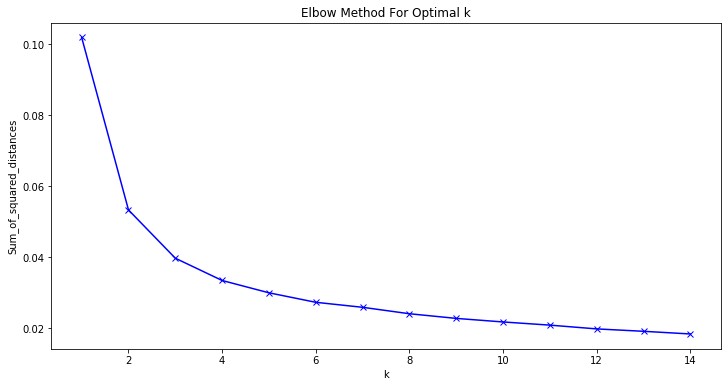

In [185]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(pca_x_pre)
    Sum_of_squared_distances.append(km.inertia_)
    
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

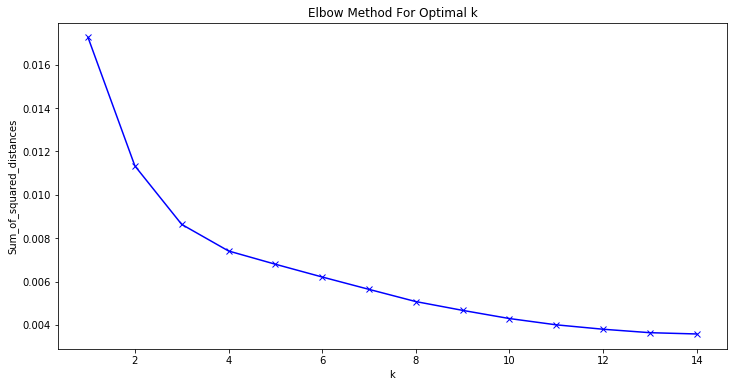

In [188]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(pca_x_post)
    Sum_of_squared_distances.append(km.inertia_)
    
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Use 3 clusters for pre and post covid stock data because it makes sense here and for straightforward comparison between clusters

### Note: There is clear banding behavior here that needs to be explored further.
#### There are also be outliers in the data as seen clearly by second plot

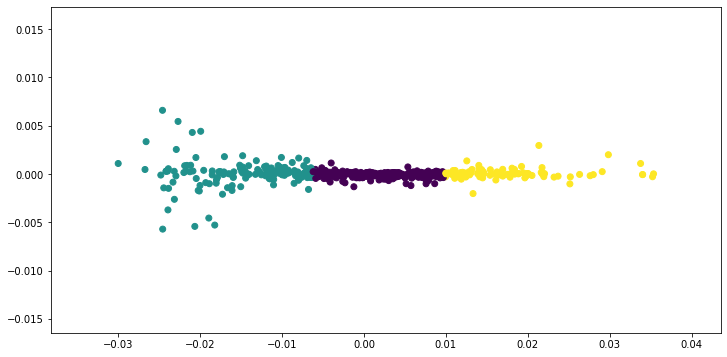

In [192]:

clusters = 3
kmeans = KMeans(n_clusters = clusters, random_state = 0).fit(pca_x_pre)
y_kmeans = kmeans.fit_predict(pca_x_pre)

# plot all clusters
# for x in range(components):
#     for y in range(x + 1, components):
# print(x, y)
plt.scatter(pca_x_pre[:, 0], pca_x_pre[:, 17], c=y_kmeans, cmap='viridis')
plt.show()

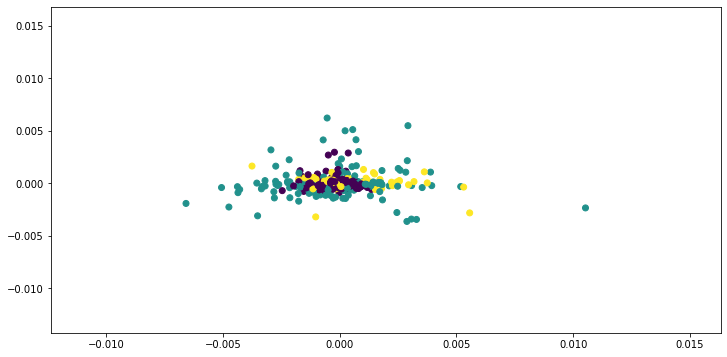

In [193]:
plt.scatter(pca_x_pre[:, 4], pca_x_pre[:, 15], c=y_kmeans, cmap='viridis')
plt.show()

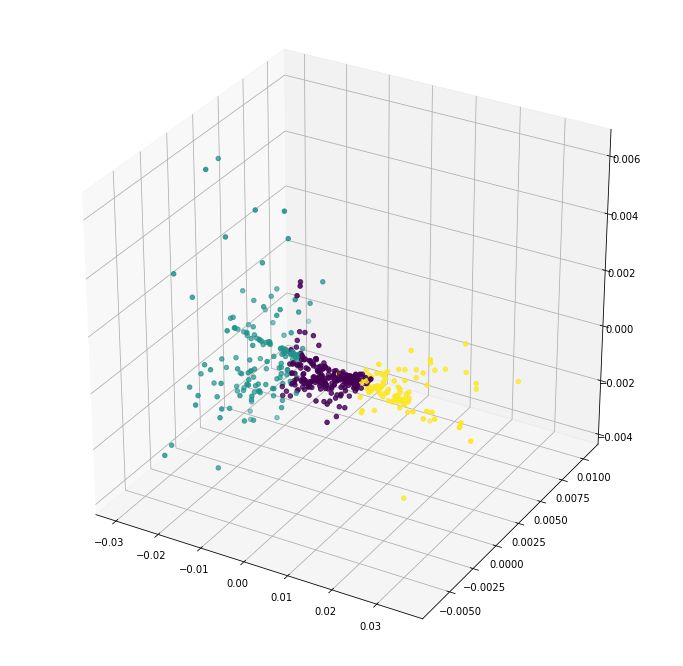

In [197]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_x_pre[:, 0], pca_x_pre[:, 4], pca_x_pre[:, 15], c=y_kmeans)

In [199]:
clusters = 3
kmeans = KMeans(n_clusters = clusters, random_state = 0).fit(pca_x_post)
y_kmeans_post = kmeans.fit_predict(pca_x_post)

In [209]:
df1_pre_t_norm['y_kmeans'] = y_kmeans
df1_post_t_norm['y_kmeans'] = y_kmeans_post

## Cluster 0

In [224]:
df1_pre_t_norm[df1_pre_t_norm['y_kmeans'] == 0].head()

Timestamp,2020-01-02 04:00:00,2020-01-02 05:00:00,2020-01-02 06:00:00,2020-01-02 07:00:00,2020-01-02 08:00:00,2020-01-02 09:00:00,2020-01-02 10:00:00,2020-01-02 11:00:00,2020-01-02 12:00:00,2020-01-02 13:00:00,...,2020-03-06 12:00:00,2020-03-06 13:00:00,2020-03-06 14:00:00,2020-03-06 15:00:00,2020-03-06 16:00:00,2020-03-06 17:00:00,2020-03-06 18:00:00,2020-03-06 19:00:00,2020-03-06 20:00:00,y_kmeans
Ticker,,,,,,,,,,,,,,,,,,,,,
A,0.001580,0.001311,0.001333,0.001258,0.001217,0.001226,0.001218,0.001218,0.001219,0.001217,...,0.001102,0.001107,0.001100,0.001105,0.001119,0.001247,0.001169,0.001190,0.000732,0
AAP,0.001200,0.000996,0.001012,0.000955,0.001182,0.001736,0.001723,0.001717,0.001712,0.001706,...,0.001361,0.001368,0.001357,0.001365,0.001384,0.001384,0.001374,0.000904,0.000556,0
ABBV,0.001599,0.001327,0.001349,0.001285,0.001285,0.001282,0.001282,0.001288,0.001285,0.001284,...,0.001280,0.001278,0.001265,0.001271,0.001282,0.001281,0.001277,0.001279,0.000741,0
ABC,0.001528,0.001268,0.001289,0.001216,0.001506,0.001179,0.001173,0.001172,0.001168,0.001168,...,0.001164,0.001172,0.001157,0.001163,0.001182,0.001206,0.001131,0.001151,0.000707,0
ABT,0.001596,0.001324,0.001246,0.001242,0.001239,0.001242,0.001238,0.001239,0.001239,0.001242,...,0.001159,0.001167,0.001159,0.001163,0.001176,0.001259,0.001181,0.001201,0.000739,0


* Both A and AAP have a peak
* They both present a sort of seasonality and stationarity in their data

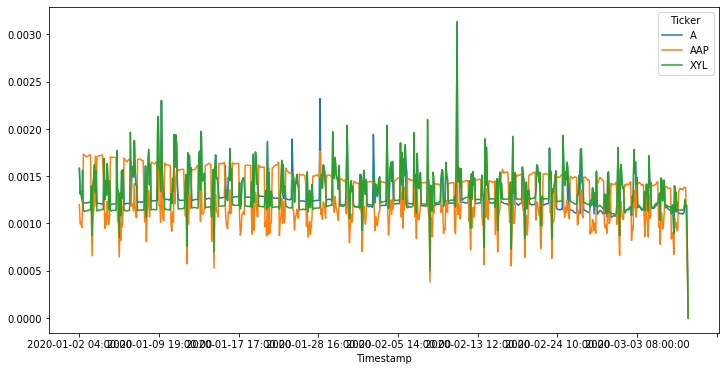

In [223]:
df1_pre_t_norm.loc[['A', 'AAP', 'XYL']].T.plot()

In [226]:
df1_post_t_norm[df1_post_t_norm['y_kmeans'] == 0].head()

Timestamp,2020-01-02 04:00:00,2020-01-02 05:00:00,2020-01-02 06:00:00,2020-01-02 07:00:00,2020-01-02 08:00:00,2020-01-02 09:00:00,2020-01-02 10:00:00,2020-01-02 11:00:00,2020-01-02 12:00:00,2020-01-02 13:00:00,...,2020-03-06 12:00:00,2020-03-06 13:00:00,2020-03-06 14:00:00,2020-03-06 15:00:00,2020-03-06 16:00:00,2020-03-06 17:00:00,2020-03-06 18:00:00,2020-03-06 19:00:00,2020-03-06 20:00:00,y_kmeans
Ticker,,,,,,,,,,,,,,,,,,,,,
AAL,0.000760,0.000631,0.000641,0.000605,0.000749,0.000200,0.000198,0.000198,0.000198,0.000198,...,0.000112,0.000112,0.000110,0.000109,0.000109,0.000600,0.000562,0.000572,0.000352,0
ADM,0.000638,0.000529,0.000538,0.000267,0.000628,0.000267,0.000265,0.000265,0.000265,0.000264,...,0.000216,0.000216,0.000214,0.000214,0.000216,0.000503,0.000472,0.000480,0.000295,0
AES,0.000882,0.000732,0.000744,0.000702,0.000869,0.000159,0.000159,0.000159,0.000158,0.000159,...,0.000132,0.000133,0.000133,0.000133,0.000134,0.000134,0.000653,0.000664,0.000408,0
AFL,0.000675,0.000560,0.000570,0.000537,0.000665,0.000323,0.000322,0.000323,0.000323,0.000323,...,0.000245,0.000247,0.000243,0.000243,0.000248,0.000533,0.000500,0.000508,0.000313,0
AIG,0.000857,0.000711,0.000723,0.000396,0.000844,0.000400,0.000397,0.000397,0.000398,0.000398,...,0.000295,0.000294,0.000291,0.000292,0.000292,0.000292,0.000292,0.000645,0.000397,0


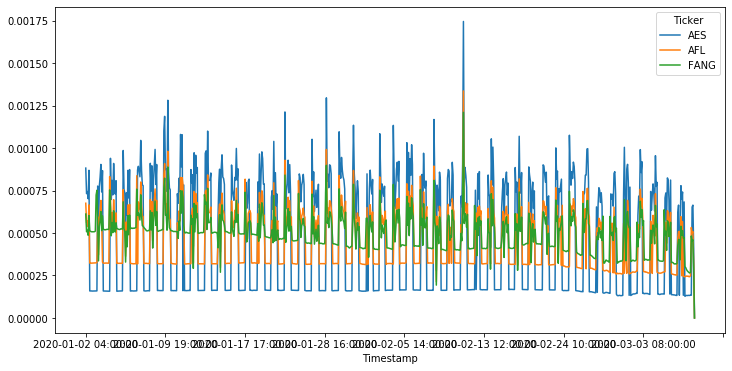

In [227]:
df1_post_t_norm.loc[['AES', 'AFL', 'FANG']].T.plot()

## Cluster 1

\

In [234]:
df1_pre_t_norm[df1_pre_t_norm['y_kmeans'] == 1].tail()

Timestamp,2020-01-02 04:00:00,2020-01-02 05:00:00,2020-01-02 06:00:00,2020-01-02 07:00:00,2020-01-02 08:00:00,2020-01-02 09:00:00,2020-01-02 10:00:00,2020-01-02 11:00:00,2020-01-02 12:00:00,2020-01-02 13:00:00,...,2020-03-06 12:00:00,2020-03-06 13:00:00,2020-03-06 14:00:00,2020-03-06 15:00:00,2020-03-06 16:00:00,2020-03-06 17:00:00,2020-03-06 18:00:00,2020-03-06 19:00:00,2020-03-06 20:00:00,y_kmeans
Ticker,,,,,,,,,,,,,,,,,,,,,
WY,0.002344,0.000673,0.001977,0.000640,0.002310,0.000638,0.000630,0.000628,0.000625,0.000622,...,0.000557,0.000558,0.000552,0.000553,0.000562,0.000550,0.001734,0.001765,0.001085,1
XEC,0.001982,0.001644,0.001672,0.001578,0.001953,0.000940,0.000939,0.000937,0.000938,0.000939,...,0.002322,0.002327,0.002307,0.002314,0.002345,0.001564,0.001466,0.001492,0.000918,1
XRAY,0.001811,0.001502,0.001527,0.001442,0.001784,0.000926,0.000923,0.000922,0.000918,0.000919,...,0.000728,0.000732,0.000725,0.000727,0.000730,0.001429,0.001340,0.001363,0.000838,1
XRX,0.002196,0.001822,0.001853,0.000730,0.002164,0.000731,0.000725,0.000723,0.000723,0.000722,...,0.000617,0.000619,0.000611,0.000613,0.000624,0.001733,0.001625,0.001654,0.001017,1
ZION,0.001921,0.001594,0.001620,0.001529,0.001893,0.000903,0.000900,0.000901,0.000904,0.000902,...,0.000613,0.000612,0.000605,0.000605,0.000611,0.001516,0.001421,0.001446,0.000889,1


In [237]:
df1_post_t_norm[df1_post_t_norm['y_kmeans'] == 1].head()

Timestamp,2020-01-02 04:00:00,2020-01-02 05:00:00,2020-01-02 06:00:00,2020-01-02 07:00:00,2020-01-02 08:00:00,2020-01-02 09:00:00,2020-01-02 10:00:00,2020-01-02 11:00:00,2020-01-02 12:00:00,2020-01-02 13:00:00,...,2020-03-06 12:00:00,2020-03-06 13:00:00,2020-03-06 14:00:00,2020-03-06 15:00:00,2020-03-06 16:00:00,2020-03-06 17:00:00,2020-03-06 18:00:00,2020-03-06 19:00:00,2020-03-06 20:00:00,y_kmeans
Ticker,,,,,,,,,,,,,,,,,,,,,
A,0.000422,0.000351,0.000356,0.000336,0.000325,0.000328,0.000326,0.000326,0.000326,0.000325,...,0.000295,0.000296,0.000294,0.000295,0.000299,0.000333,0.000313,0.000318,0.000196,1
AAP,0.000328,0.000272,0.000276,0.000261,0.000323,0.000474,0.000470,0.000469,0.000467,0.000466,...,0.000371,0.000373,0.000371,0.000373,0.000378,0.000378,0.000375,0.000247,0.000152,1
AAPL,0.000213,0.000177,0.000180,0.000170,0.000210,0.000572,0.000572,0.000574,0.000574,0.000574,...,0.000549,0.000550,0.000546,0.000548,0.000556,0.000168,0.000158,0.000161,0.000099,1
ABBV,0.000416,0.000345,0.000351,0.000334,0.000334,0.000333,0.000333,0.000335,0.000334,0.000334,...,0.000333,0.000332,0.000329,0.000330,0.000333,0.000333,0.000332,0.000333,0.000193,1
ABC,0.000411,0.000341,0.000347,0.000328,0.000405,0.000318,0.000316,0.000315,0.000314,0.000314,...,0.000313,0.000316,0.000311,0.000313,0.000318,0.000325,0.000304,0.000310,0.000190,1


## Granger Causality Test

In [251]:
cluster0_pre = df1_pre_t_norm[df1_pre_t_norm['y_kmeans'] == 0].index

In [252]:
cluster0_post = df1_post_t_norm[df1_post_t_norm['y_kmeans'] == 0].index

### pre

In [260]:
index1 = randint(0, len(cluster0_pre)-1)
index2 = randint(0, len(cluster0_pre)-1)
cluster0_pre[index1], cluster0_pre[index2]

('TIF', 'DFS')

In [331]:
# both happen to be travel and luxury brands (one US and one Hong Kong based)
tif = df1_pre[df1_pre['Ticker'] == 'TIF']
dfs = df1_pre[df1_pre['Ticker'] == 'DFS']

In [332]:
tif = tif.reset_index().drop(columns={'index', 'Timestamp', 'Ticker'}).rename(columns={'ClosePrice' : 'tif'})
dfs = dfs.reset_index().drop(columns={'index', 'Timestamp', 'Ticker'}).rename(columns={'ClosePrice' : 'dfs'})

In [333]:
frames = [tif, dfs]
new_df = pd.concat(frames, axis = 1)
new_df.dropna(inplace = True)

In [334]:
new_df.head(2)

,tif,dfs
0,133.00,84.831034
1,133.25,84.668500


In [321]:
grangercausalitytests(new_df[['tif', 'dfs']], maxlag=24)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=7.7370  , p=0.0057  , df_denom=413, df_num=1
ssr based chi2 test:   chi2=7.7932  , p=0.0052  , df=1
likelihood ratio test: chi2=7.7211  , p=0.0055  , df=1
parameter F test:         F=7.7370  , p=0.0057  , df_denom=413, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.6055  , p=0.0280  , df_denom=410, df_num=2
ssr based chi2 test:   chi2=7.2989  , p=0.0260  , df=2
likelihood ratio test: chi2=7.2354  , p=0.0268  , df=2
parameter F test:         F=3.6055  , p=0.0280  , df_denom=410, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.2369  , p=0.0834  , df_denom=407, df_num=3
ssr based chi2 test:   chi2=6.8261  , p=0.0777  , df=3
likelihood ratio test: chi2=6.7704  , p=0.0796  , df=3
parameter F test:         F=2.2369  , p=0.0834  , df_denom=407, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.5031  , p=0.0419  

{1: ({'ssr_ftest': (7.73699328632344, 0.005657896848255058, 413.0, 1),
   'ssr_chi2test': (7.793194206078815, 0.005244339813629486, 1),
   'lrtest': (7.721095810788711, 0.005457925834270632, 1),
   'params_ftest': (7.736993286335754, 0.005657896848217349, 413.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3.6054669704841475, 0.02803986435466338, 410.0, 2),
   'ssr_chi2test': (7.298872159760593, 0.026005789832650596, 2),
   'lrtest': (7.235429963770912, 0.026843945367165264, 2),
   'params_ftest': (3.605466970478851, 0.02803986435480932, 410.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (2.2368933157342052, 0.08341013520425578, 407.0, 3),
   'ssr_chi2test': (6.826097047031653, 0.07765212912146859, 3),
   'lrtest': (6.7704331962092965, 0.079586177964281, 3),
   'params_ftest': (2.236893315754345, 0.0834101352020654, 407.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0.,

Note: There is a strong statistical significance of TIF stock influencing DFS stock.
For up to 24 lags, the p-value is less than alpha=0.1, so there we can reject the null hypothesis that there is no granger causality between the two stocks

### Post

In [324]:
'TIF' in cluster0_post, 'DFS' in cluster0_post

(False, True)

In [325]:
tif = df1_post[df1_post['Ticker'] == 'TIF']
dfs = df1_post[df1_post['Ticker'] == 'DFS']

In [326]:
tif = tif.reset_index().drop(columns={'index', 'Timestamp', 'Ticker'}).rename(columns={'ClosePrice' : 'tif'})
dfs = dfs.reset_index().drop(columns={'index', 'Timestamp', 'Ticker'}).rename(columns={'ClosePrice' : 'dfs'})

In [327]:
frames = [tif, dfs]
new_df = pd.concat(frames, axis = 1)
new_df.dropna(inplace = True)

In [328]:
new_df.head(2)

,tif,dfs
0,131.000000,58.506667
1,130.961875,58.100000


In [329]:
grangercausalitytests(new_df[['tif', 'dfs']], maxlag=24)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.4453  , p=0.5047  , df_denom=1721, df_num=1
ssr based chi2 test:   chi2=0.4461  , p=0.5042  , df=1
likelihood ratio test: chi2=0.4460  , p=0.5042  , df=1
parameter F test:         F=0.4453  , p=0.5047  , df_denom=1721, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.6873  , p=0.5031  , df_denom=1718, df_num=2
ssr based chi2 test:   chi2=1.3786  , p=0.5019  , df=2
likelihood ratio test: chi2=1.3781  , p=0.5021  , df=2
parameter F test:         F=0.6873  , p=0.5031  , df_denom=1718, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.7425  , p=0.1563  , df_denom=1715, df_num=3
ssr based chi2 test:   chi2=5.2489  , p=0.1545  , df=3
likelihood ratio test: chi2=5.2409  , p=0.1550  , df=3
parameter F test:         F=1.7425  , p=0.1563  , df_denom=1715, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.9197  , p=0.

{1: ({'ssr_ftest': (0.44530426698270614, 0.5046628229011054, 1721.0, 1),
   'ssr_chi2test': (0.4460805091680334, 0.5042021589850609, 1),
   'lrtest': (0.4460228080356501, 0.5042297357257973, 1),
   'params_ftest': (0.4453042669826274, 0.5046628229011054, 1721.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (0.6873195371497057, 0.5030605652377993, 1718.0, 2),
   'ssr_chi2test': (1.378639770091901, 0.5019173144811216, 2),
   'lrtest': (1.3780885122937434, 0.5020556764653454, 2),
   'params_ftest': (0.6873195371515601, 0.5030605652368868, 1718.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.742506076105656, 0.1563055902962113, 1715.0, 3),
   'ssr_chi2test': (5.24885503741214, 0.15445575073961057, 3),
   'lrtest': (5.24087169763834, 0.15498548044481403, 3),
   'params_ftest': (1.742506076106963, 0.15630559029595947, 1715.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0

Note: Here we can clearly see that, using alpha=0.1, there is no longer any statistical significance between the 2 companies post covid lockdown. I believe this is very interesting